Libraries Required

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

Importing Dataset And Pre-processing 

In [68]:
df = pd.read_csv("predictive_maintenance.csv")

In [69]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [70]:
df.isnull().values.any()

False

In [71]:
df['Failure Type'] = df['Failure Type'].map({
    'No Failure': 0, 'Heat Dissipation Failure': 1, 'Power Failure': 2,
    'Overstrain Failure': 3, 'Tool Wear Failure': 4, 'Random Failures': 5
})

In [72]:
df['Type'] = df['Type'].map({
    'L': 0, 'M': 1, 'H': 2
})

In [73]:
df.drop(['Product ID',"UDI","Target"], axis=1, inplace=True)

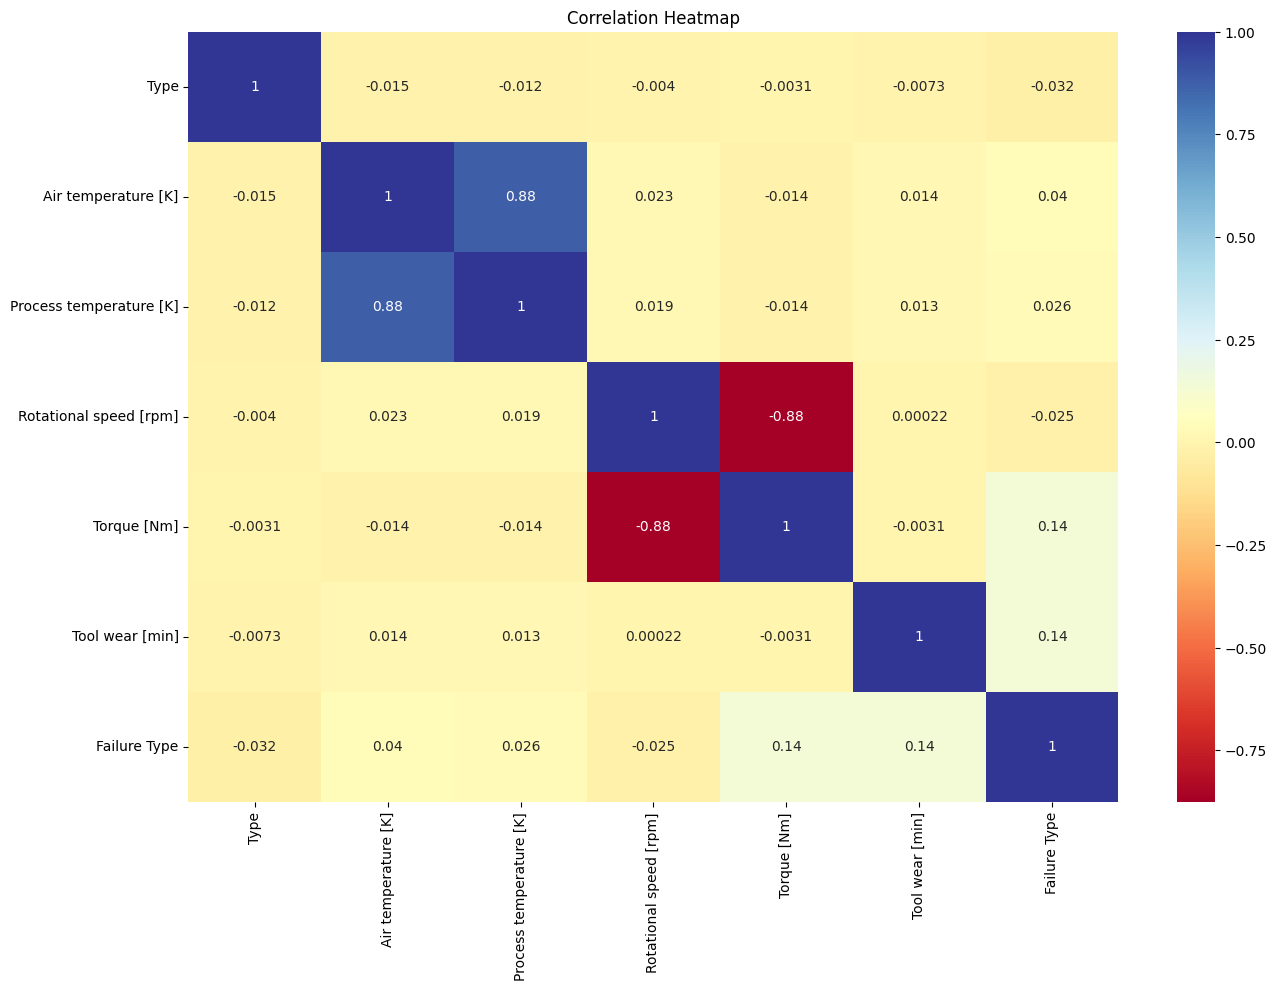

In [74]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Heatmap')
plt.show()

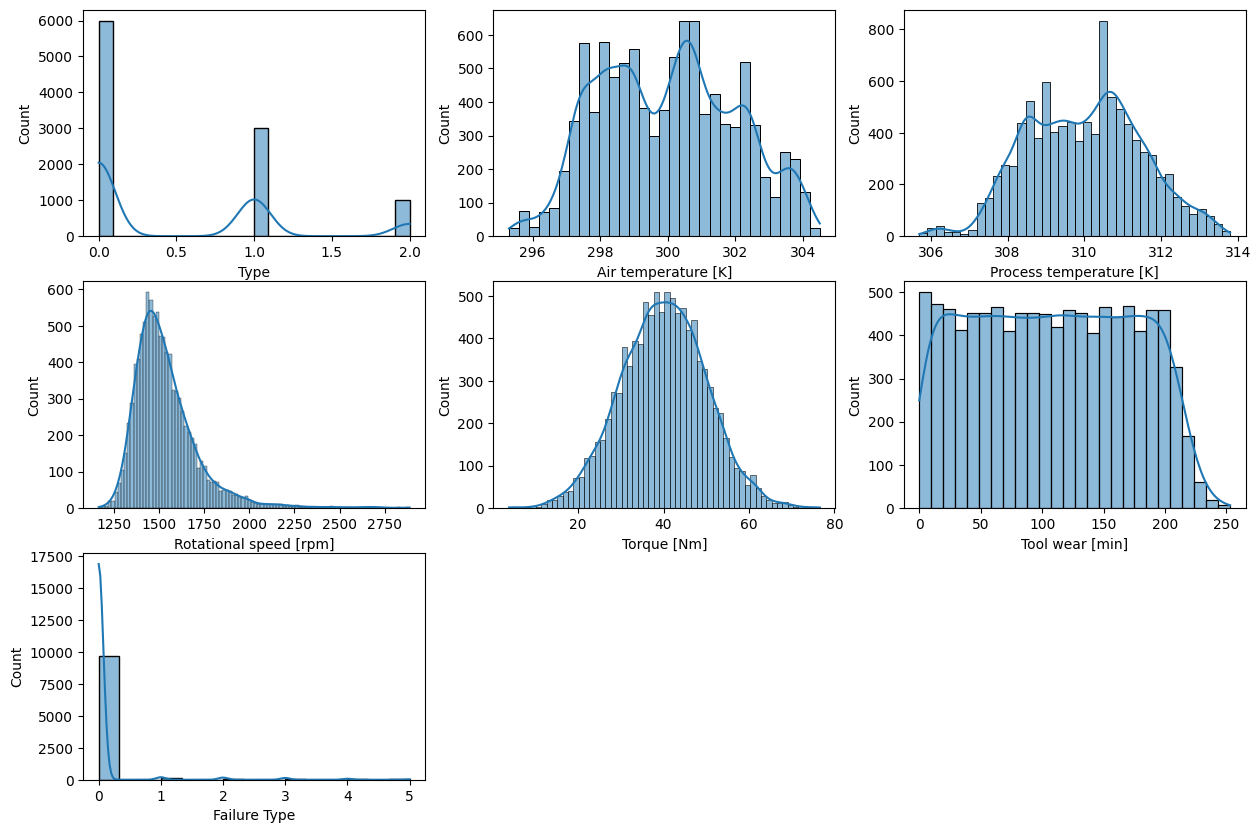

In [75]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Failure Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

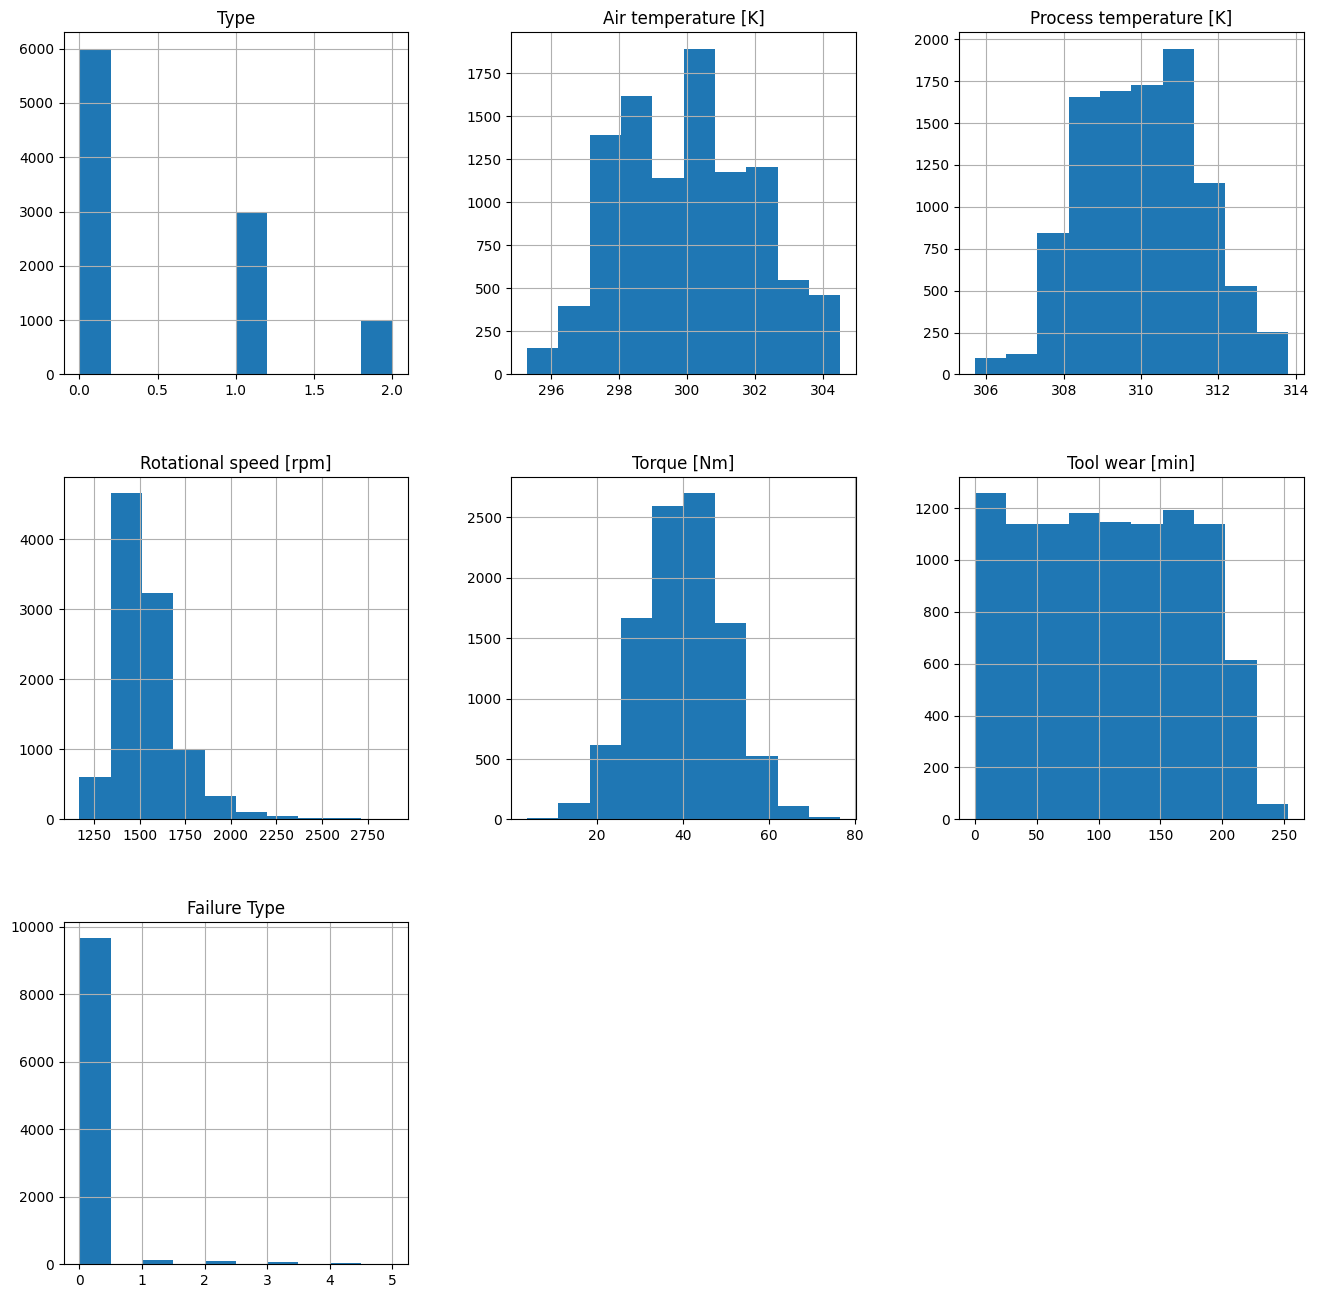

In [11]:

df.hist(figsize=(16, 16))

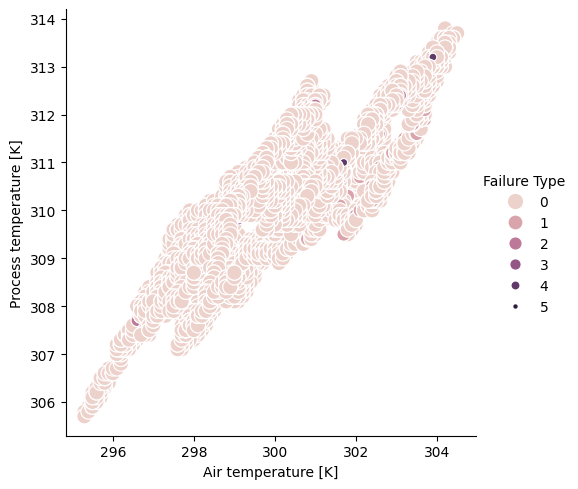

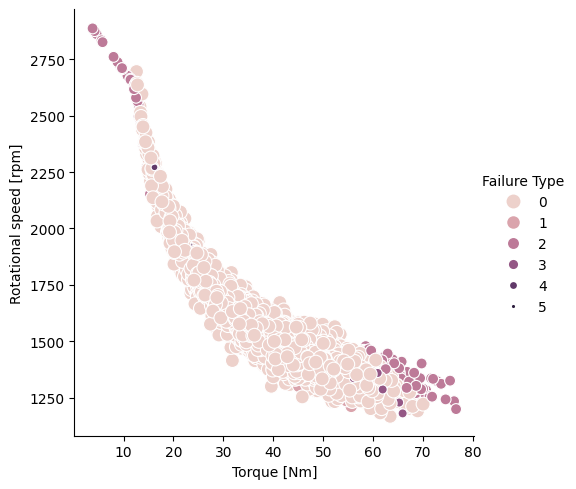

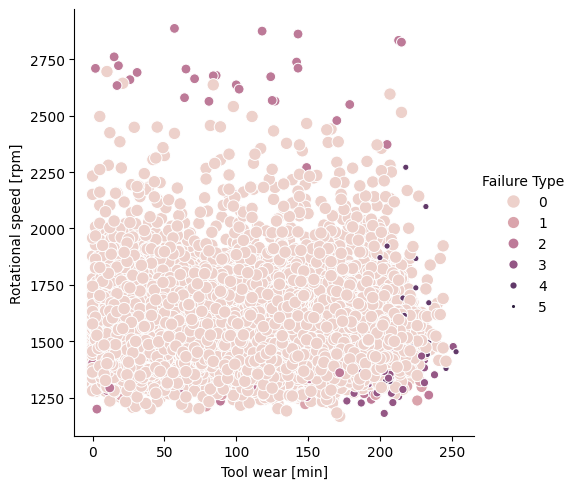

In [76]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10),data=df)
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

In [77]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [78]:
X = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df[["Failure Type"]]

Splitting Data into Training and Testing 

In [79]:
# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Undersampaling the dataset

In [80]:
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)


Visualizig and comparing the undersampled dataset

C:\Users\TUSHAR\AppData\Local\Temp\ipykernel_14636\1330073603.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_original, ax=axes[0], palette='viridis')
C:\Users\TUSHAR\AppData\Local\Temp\ipykernel_14636\1330073603.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_resampled, ax=axes[1], palette='viridis')


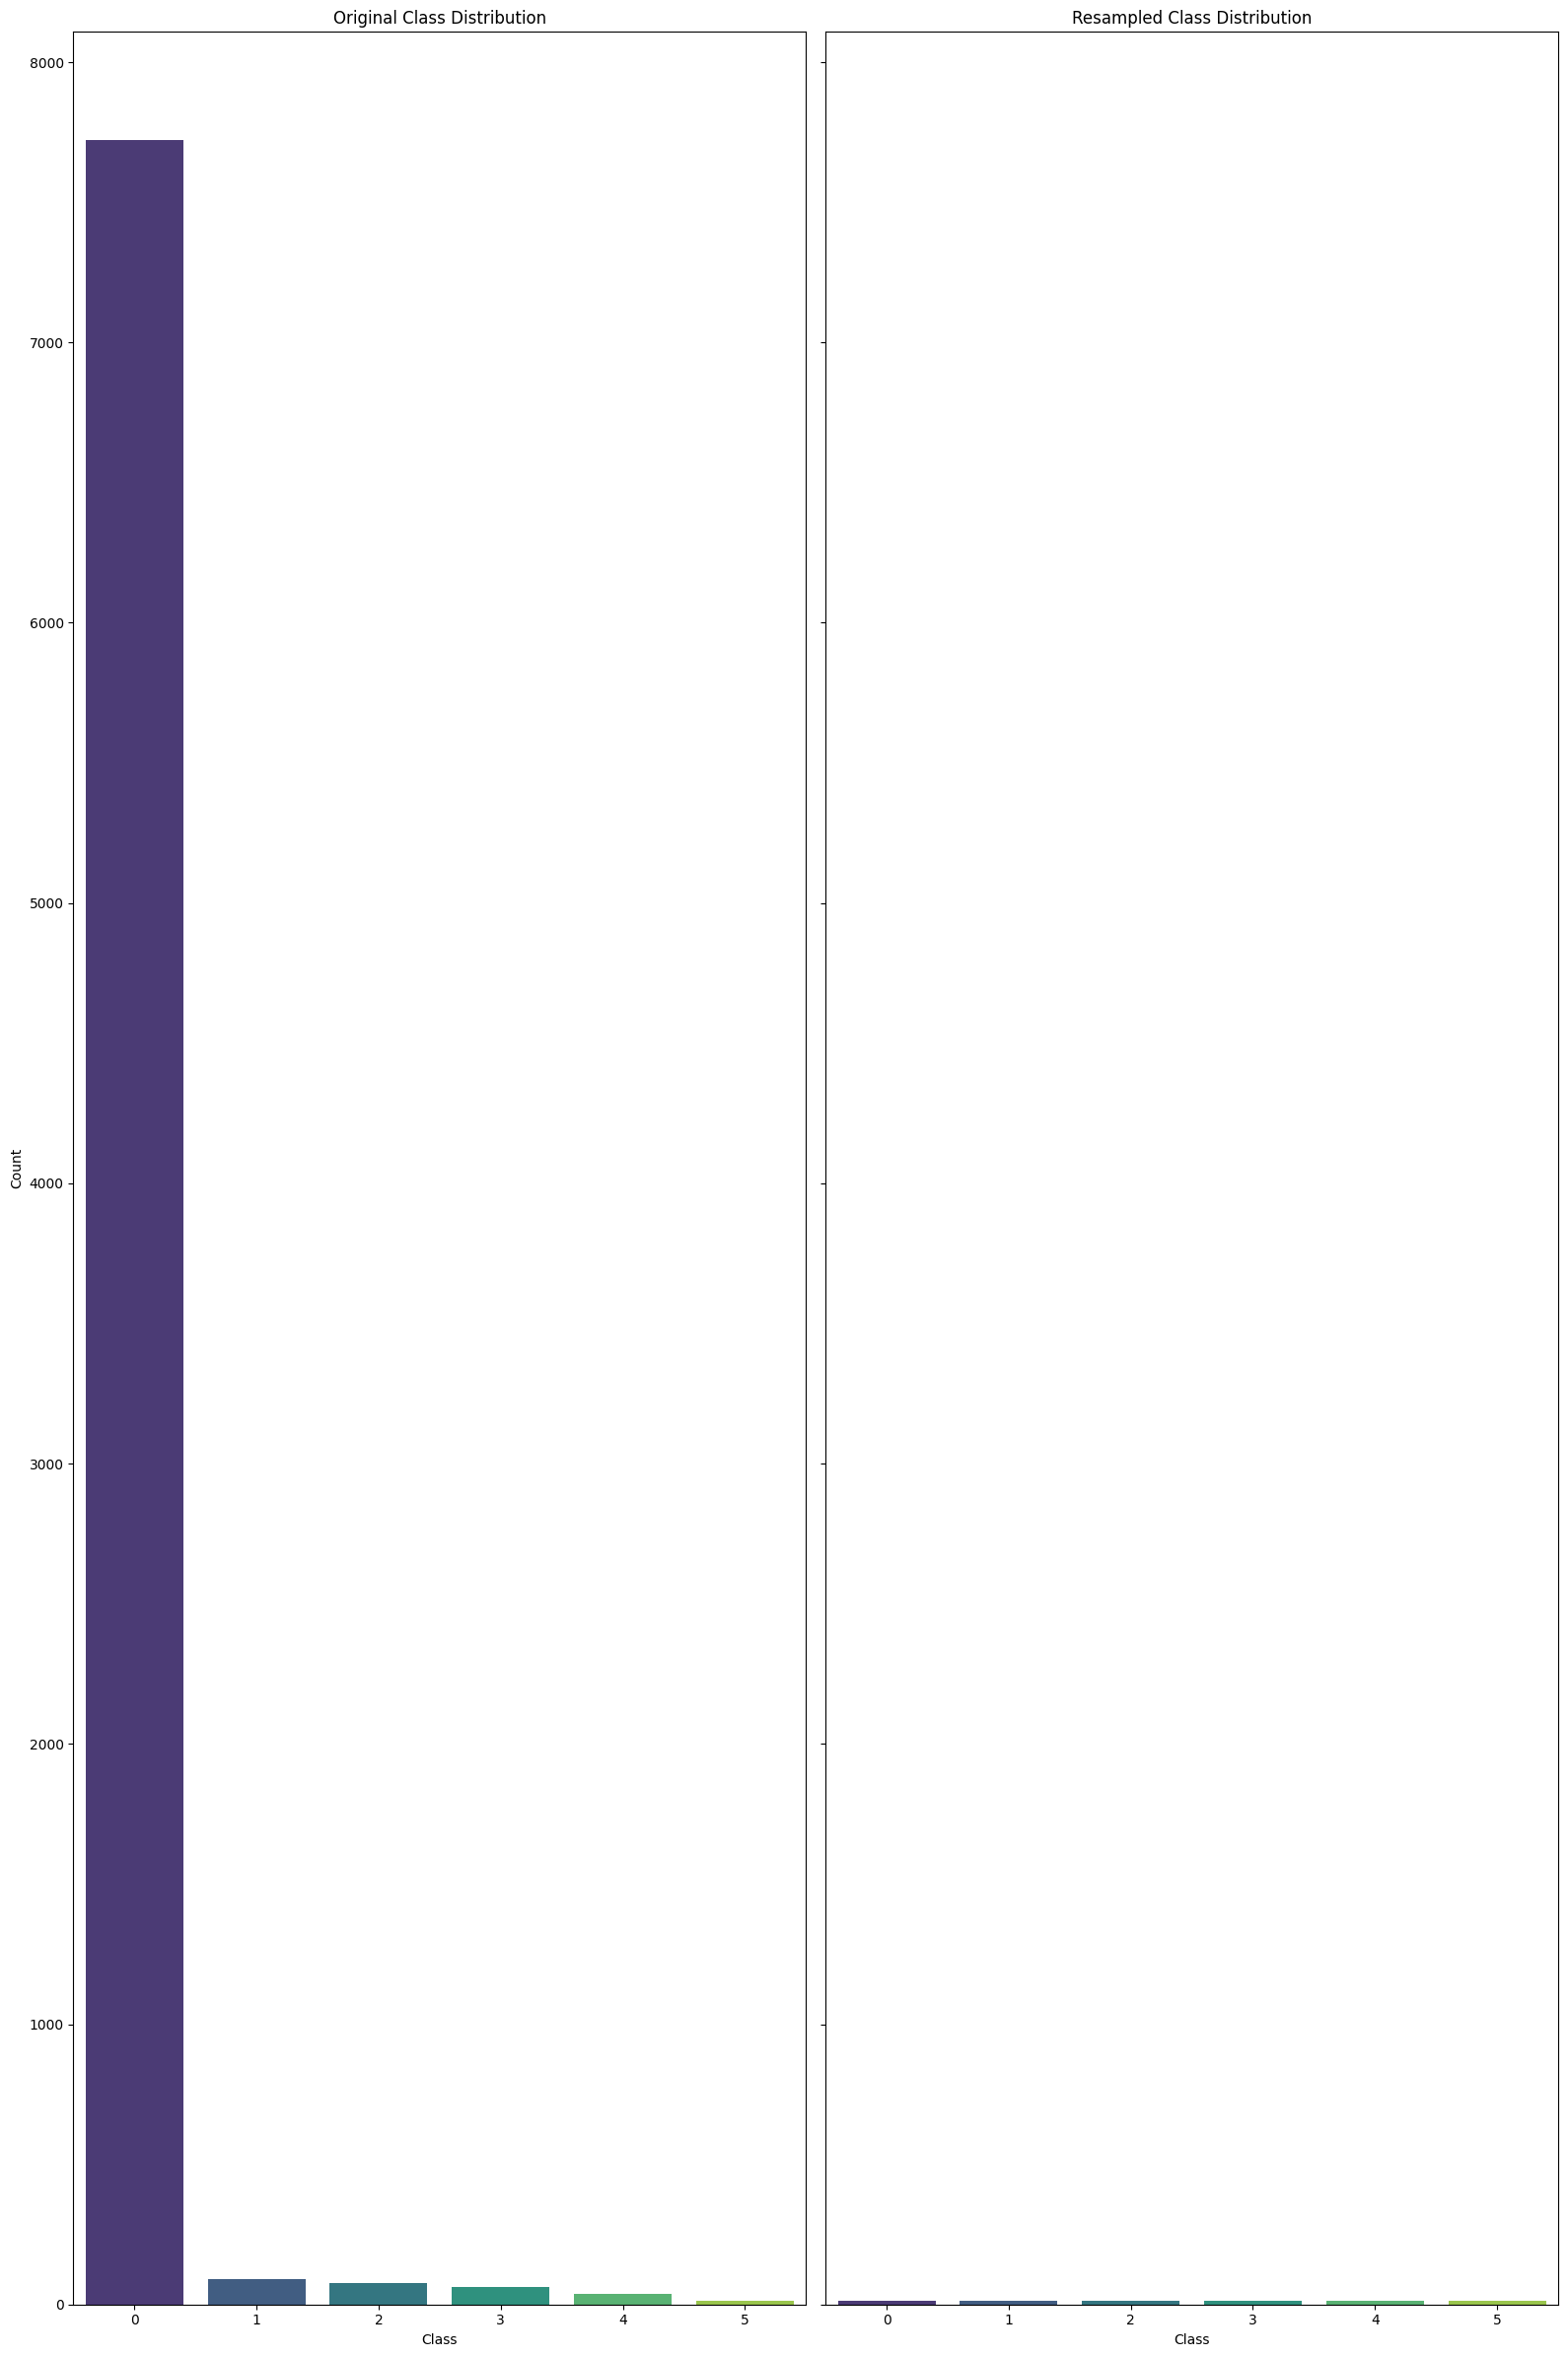

In [81]:
y_train_flat = y_train.values.flatten()  
y_train_resampled_flat = y_train_resampled.values.flatten()  

y_train_series = pd.Series(y_train_flat)
y_train_resampled_series = pd.Series(y_train_resampled_flat)

df_original = pd.DataFrame({'Class': y_train_series})
df_resampled = pd.DataFrame({'Class': y_train_resampled_series})

fig, axes = plt.subplots(1, 2, figsize=(16, 24), sharey=True)  

sns.countplot(x='Class', data=df_original, ax=axes[0], palette='viridis')
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

sns.countplot(x='Class', data=df_resampled, ax=axes[1], palette='viridis')
axes[1].set_title('Resampled Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Training  the Model

In [82]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

C:\Users\TUSHAR\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced')

Making Predictions

In [83]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1930
           1       1.00      0.55      0.71        22
           2       0.80      0.42      0.55        19
           3       0.89      0.50      0.64        16
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4

    accuracy                           0.98      2000
   macro avg       0.61      0.41      0.48      2000
weighted avg       0.97      0.98      0.97      2000

ROC-AUC Score: 0.8695869631060039


C:\Users\TUSHAR\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TUSHAR\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TUSHAR\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Calculating Precision

In [84]:
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print(f"Precision: {precision}")

Precision: 0.6114290013731355


In [85]:

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1929    0    1    0    0    0]
 [  10   12    0    0    0    0]
 [  10    0    8    1    0    0]
 [   7    0    1    8    0    0]
 [   9    0    0    0    0    0]
 [   4    0    0    0    0    0]]


In [86]:

# Sample dataset (replace with your actual data)
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate precision with zero_division set to 0 to suppress the warning
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print(f"Precision: {precision}")

# Review confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Precision: 0.0
Confusion Matrix:
[[0 1]
 [2 0]]


Cross Validating

In [87]:

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
print(f'Cross-Validation F1 Macro Scores: {scores}')


Cross-Validation F1 Macro Scores: [0.33333333 0.33333333 1.         0.33333333 0.33333333]


Calculating Accuracy

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.0000


Preparing Pickle file

In [89]:
data = {
    'Type': [5, 6, 7, 8, 9, 10],
    'Air temperature [K]': [0, 1, 2, 3, 4, 5],
    'Process temperature [K]': [1, 2, 3, 4, 5, 6],
    'Rotational speed [rpm]': [2, 3, 4, 5, 6, 7],
    'Torque [Nm]': [4, 5, 6, 7, 8, 9],
    'Tool wear [min]': [3, 4, 5, 6, 7, 8],
    
}
df = pd.DataFrame(data)
y = [0, 1, 0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

